In [18]:
import json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import subprocess
import re
from PIL import Image
from copy import deepcopy
import cv2
import numpy as np

## Plots

pixiz-06-12-2022-14-31-18_jpg.rf.65ecc44de67a341cd1f4ba33e5677036.jpg


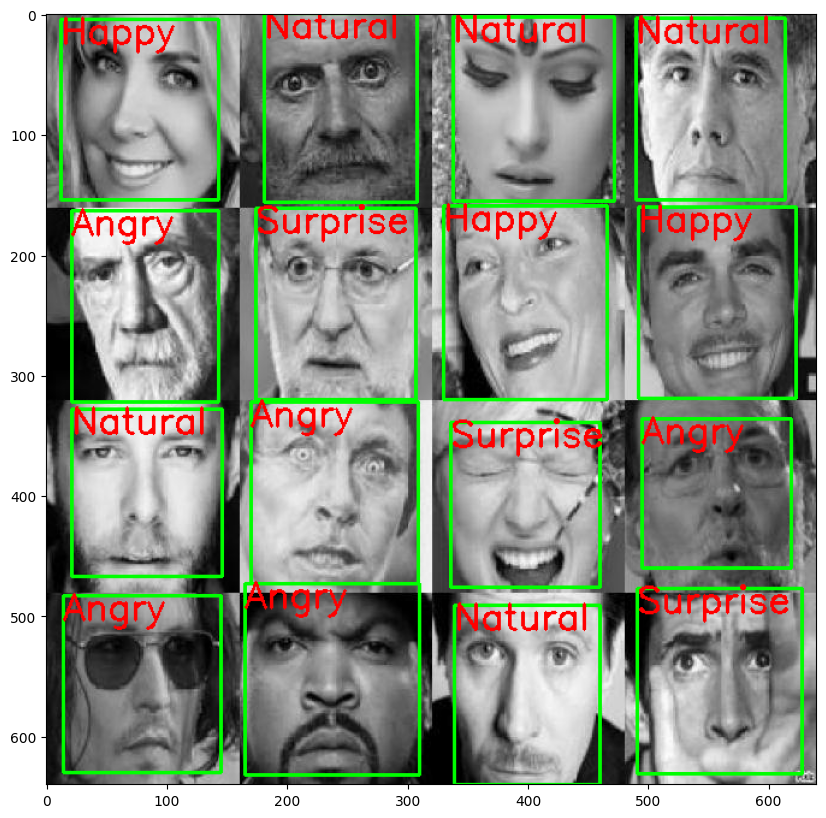

18_jpg.rf.da6f074623429427c20dd26d341b1ec6.jpg


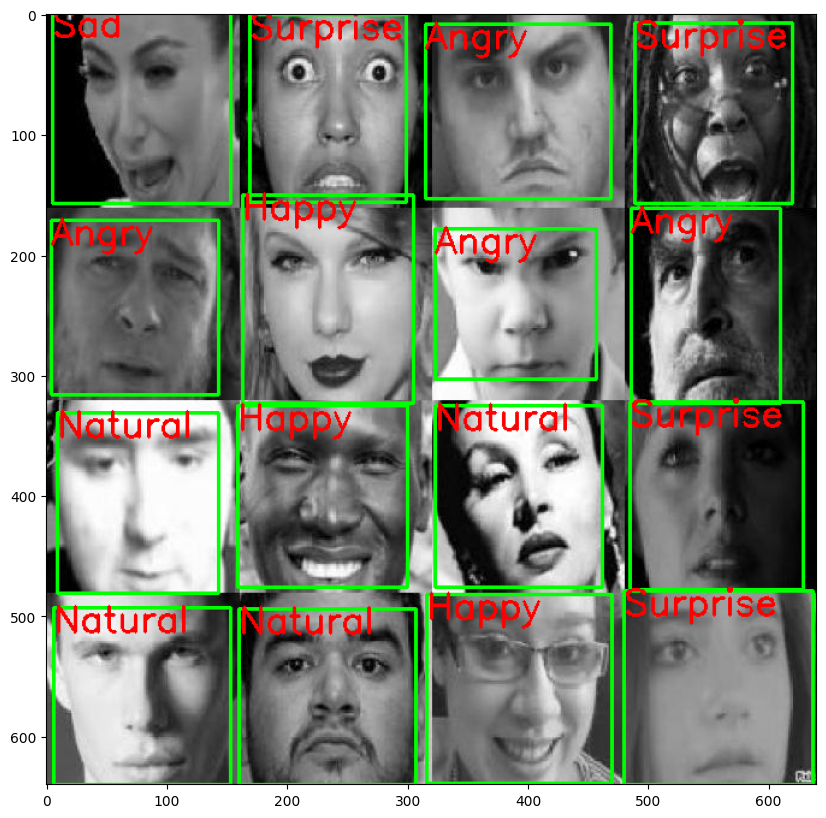

pixiz-06-12-2022-14-31-18_jpg.rf.6a512027a6c04666b4bf2937e1277c1c.jpg


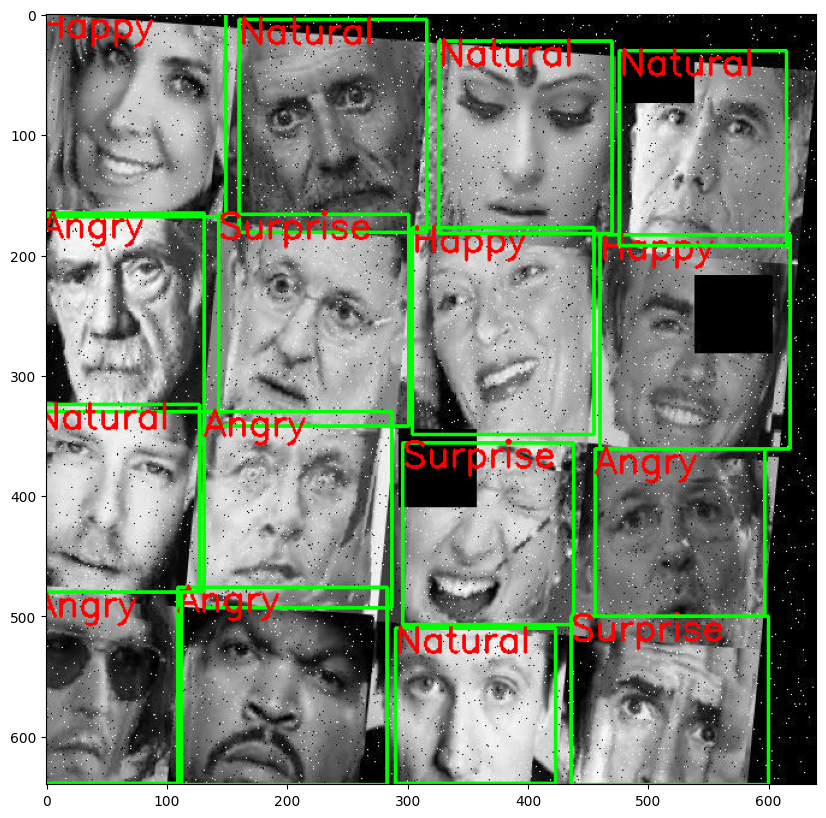

26_jpg.rf.64bed20ce8a9200cb41e20c8602280c5.jpg


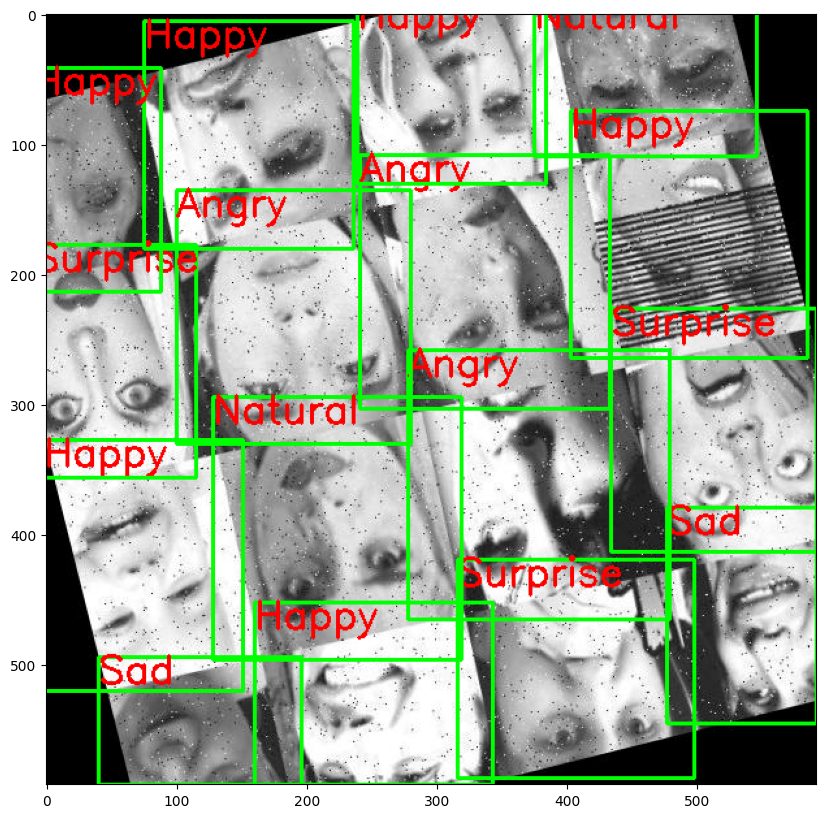

16_jpg.rf.cc1a5250c3e0eea6d56c3d15594a882d.jpg


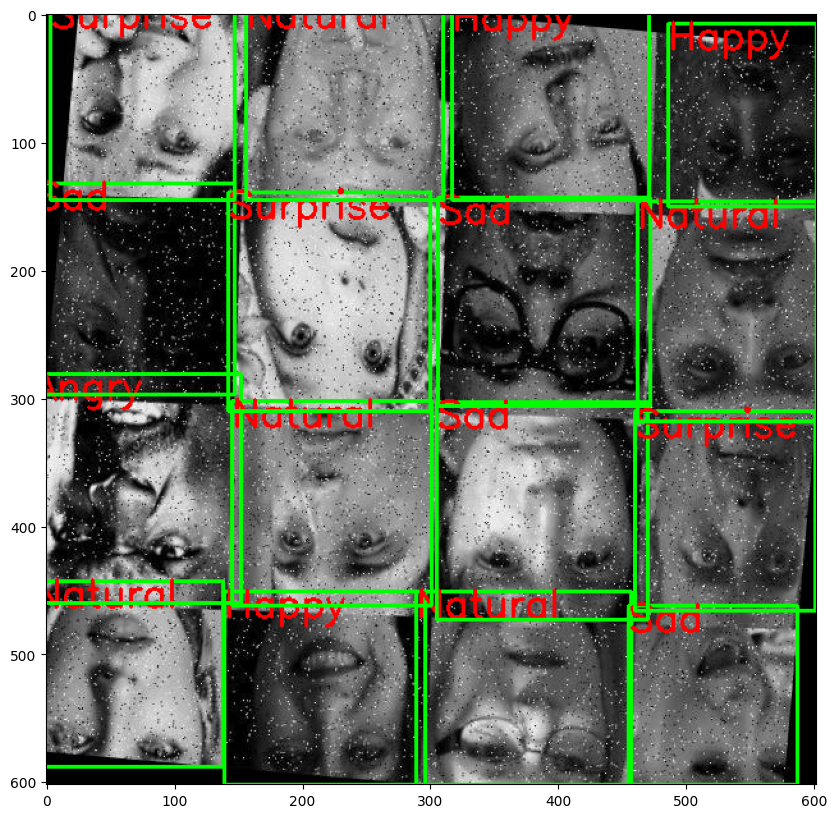

44_jpg.rf.9d21802d3d115af8c6255d1e90e50cbe.jpg


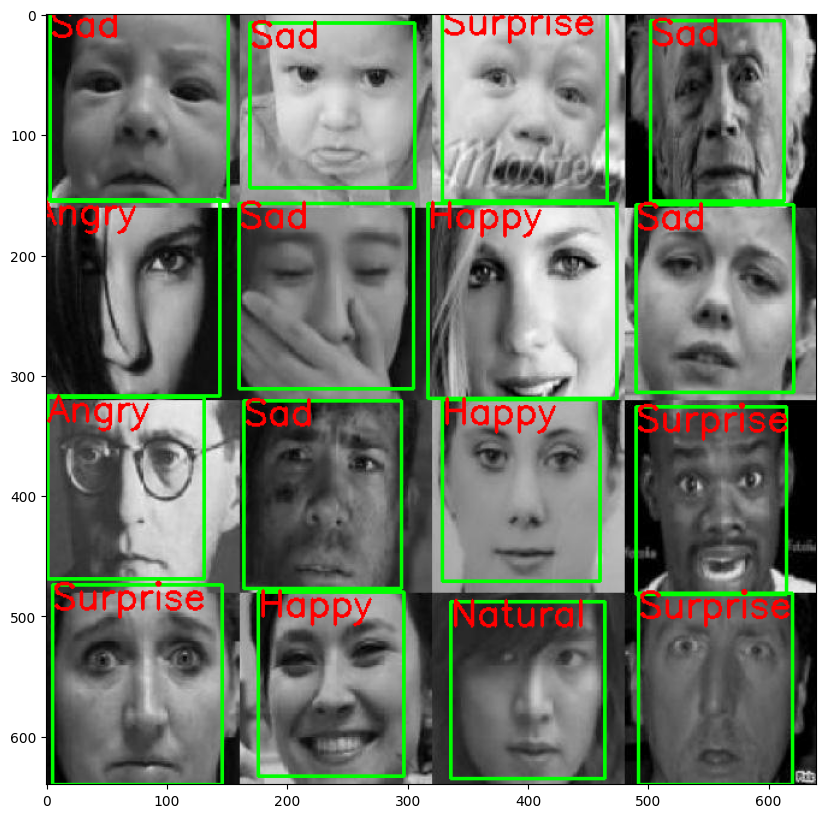

In [19]:
## image
image_file = 'pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg'
image_file = 'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg'
image_file = '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg'
image_file = 'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg'
image_file = '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg'

image_files = ['pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg',
                'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg',
                '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg',
                'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg',
                '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg']


multi_labels_root = "./data/full_data/splitted_by_label/MultLabel/"
image_files = os.listdir(multi_labels_root)

n_images = len(image_files)

for i in range(n_images):

    image_file = image_files[i]
    print(image_file)
    # break
    image_path = os.path.join("./data/full_data/splitted_by_label/MultLabel/",image_file)
    
    with open("../src/data/full_data/full_annotations.json","r") as file:
    
        anns = json.load(file)
    
        annotations = anns['annotations']
        categories = anns['categories']
        image_id = [img['id'] for img in anns['images'] if img['file_name'] == image_file][0]
    
        image_anntoations = []
        image_categories = []
        
        for ann in annotations:
    
    
            img_id = ann['image_id']
    
            if img_id == image_id:
                # print(ann)
                # print()
                image_anntoations.append(ann)
            

    image = cv2.imread(image_path).copy()
    # cv
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 0, 0)  # White in BGR
    thickness = 2
    
    
    for img_ann in image_anntoations:
    
        x_1,y_1,x_2,y_2 = [int(x) for x in img_ann['bbox']]
        x_1,y_1 = x_1-10,y_1 - 10
        x_2,y_2 = x_2+10,y_2 + 10
        cat_id = img_ann['category_id']
        cat_name = [cat['name'] for cat in categories if cat['id'] == cat_id][0]
    
        cv2.rectangle(image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
        cv2.putText(image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)
    
    
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
    # break

    if i == 5:
        # break
        break

    

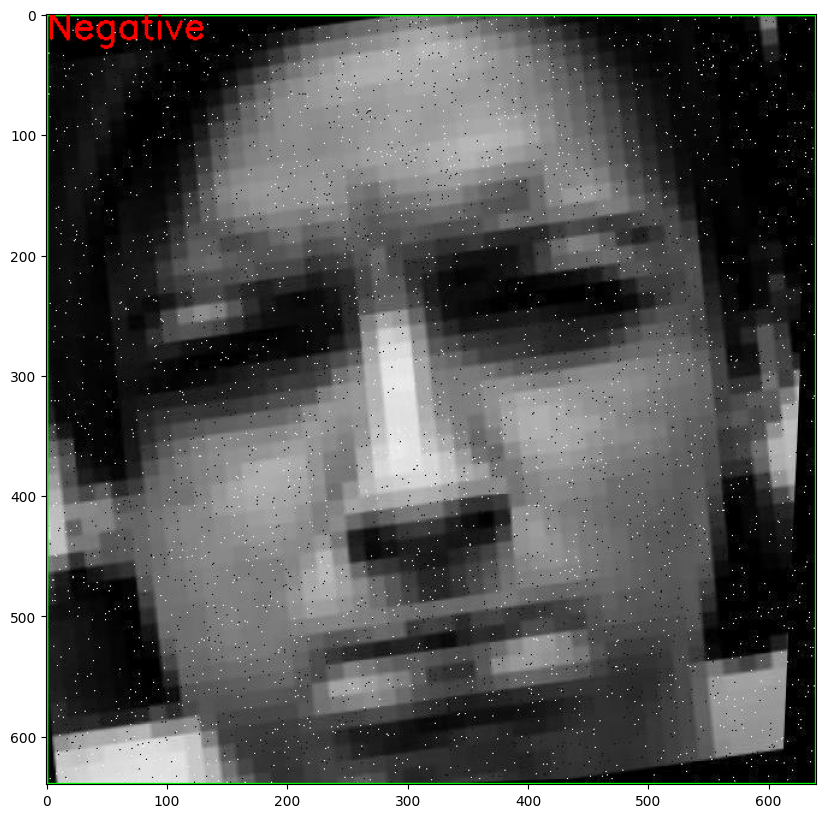

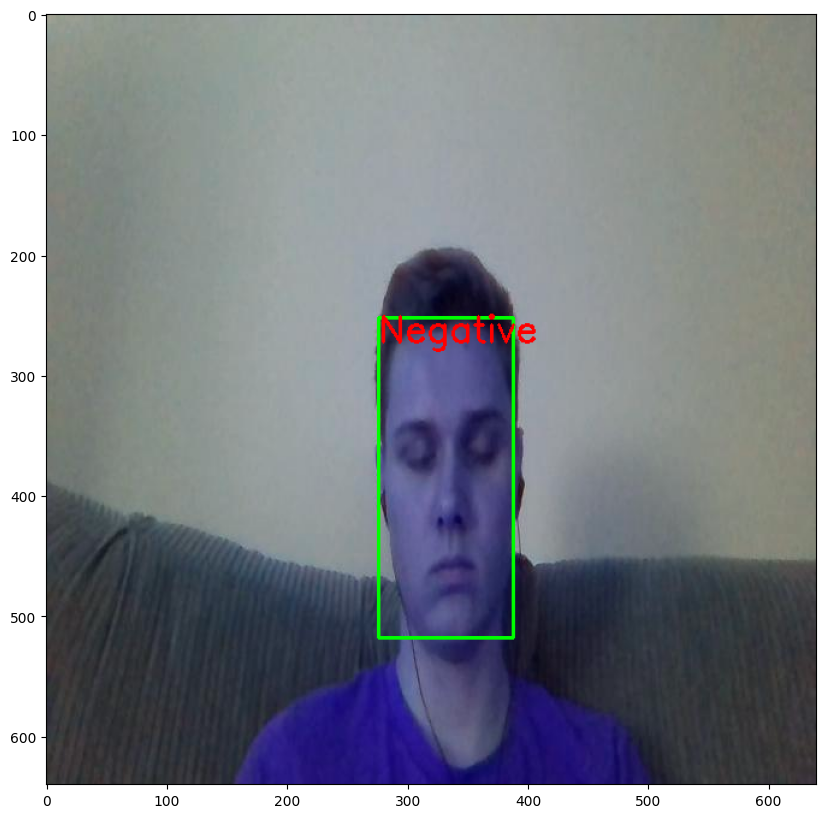

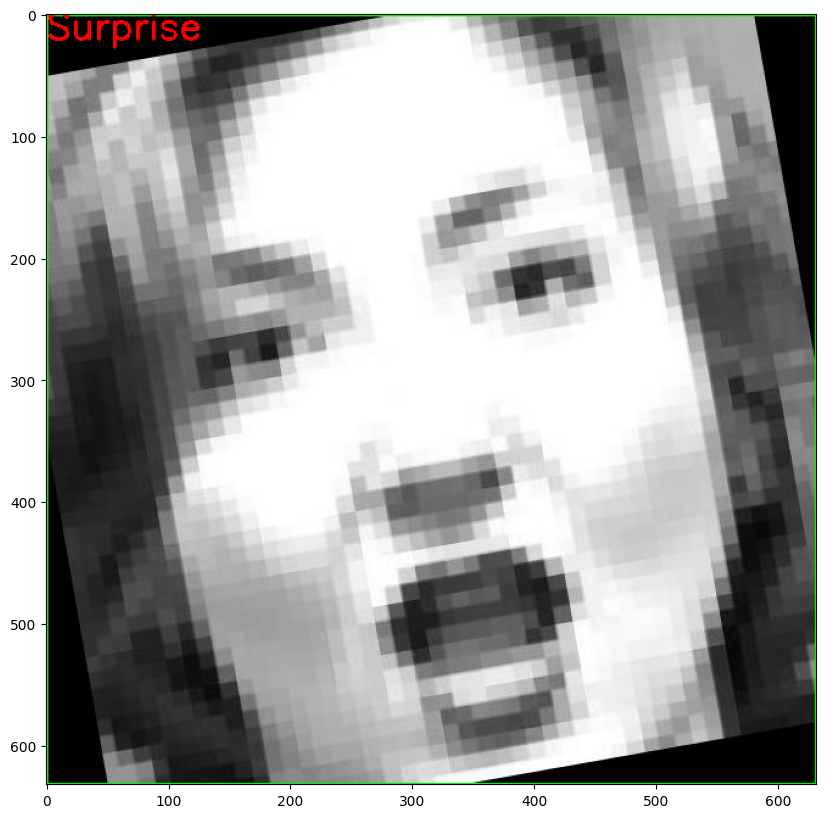

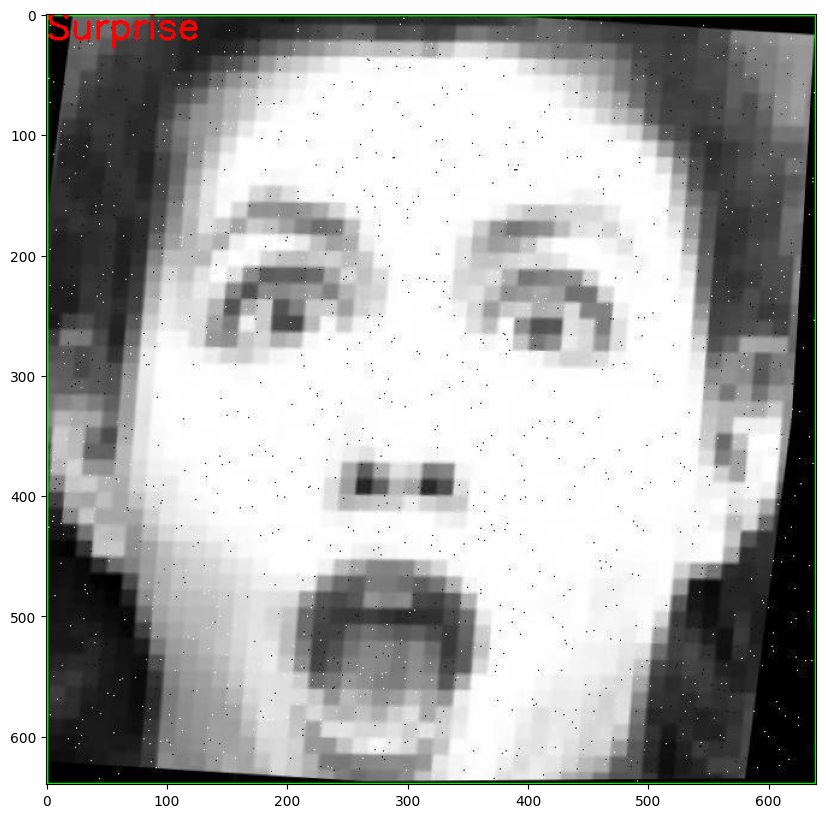

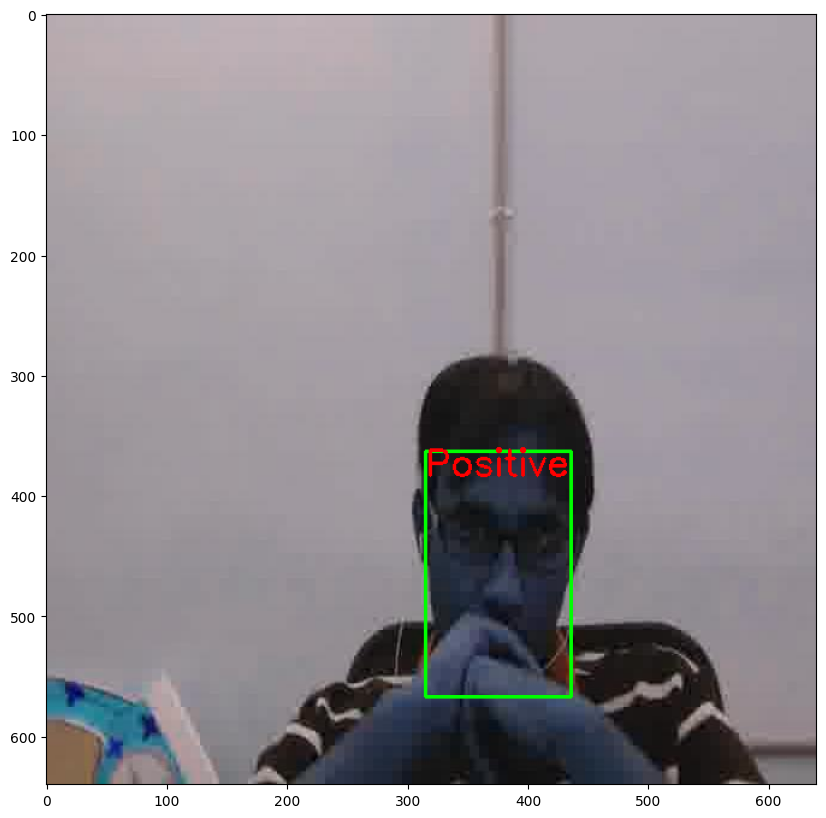

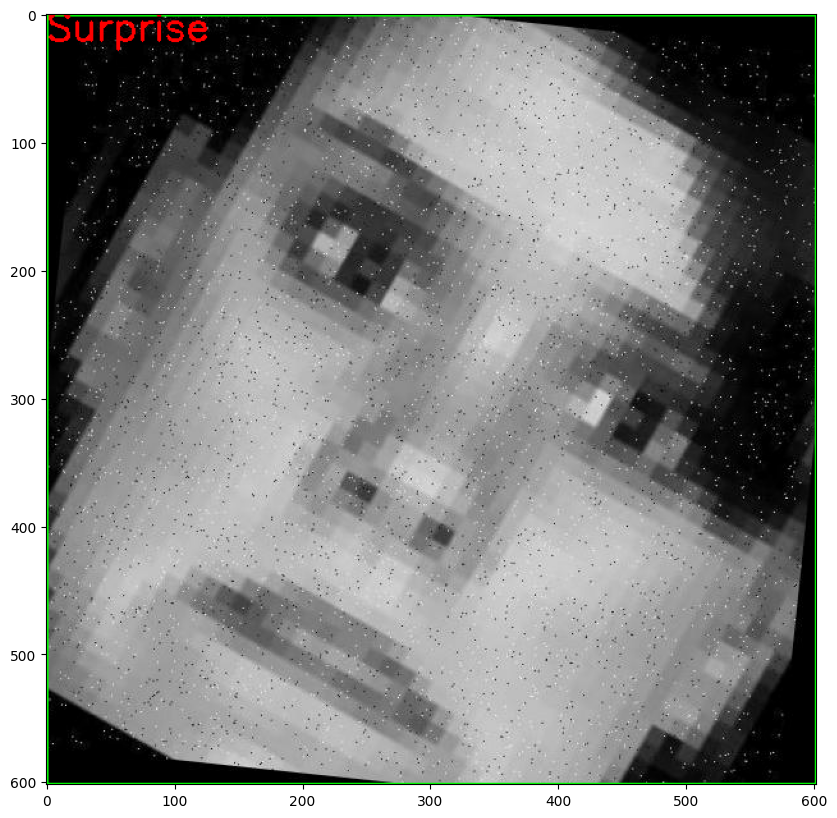

In [20]:
## image
image_file = 'pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg'
image_file = 'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg'
image_file = '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg'
image_file = 'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg'
image_file = '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg'

image_files = ['pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg',
                'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg',
                '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg',
                'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg',
                '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg']


multi_labels_root = "./data/full_data/full_nnps/nnps_full_images/"
image_files = os.listdir(multi_labels_root)




n_images = len(image_files)

for i in range(n_images):

    image_file = image_files[i]
    image_path = os.path.join("./data/full_data/full_nnps/nnps_full_images/",image_file)
    
    with open("../src/data/full_data/full_nnps/nnps_annotations.json","r") as file:
    
        anns = json.load(file)
    
        annotations = anns['annotations']
        categories = anns['categories']
        image_id = [img['id'] for img in anns['images'] if img['file_name'] == image_file][0]
    
        image_anntoations = []
        image_categories = []
        
        for ann in annotations:
    
    
            img_id = ann['image_id']
    
            if img_id == image_id:
                # print(ann)
                # print()
                image_anntoations.append(ann)
            

    image = cv2.imread(image_path).copy()
    # cv
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 0, 0)  # White in BGR
    thickness = 2
    
    
    for img_ann in image_anntoations:
    
        x_1,y_1,x_2,y_2 = [int(x) for x in img_ann['bbox']]
        x_1,y_1 = x_1,y_1
        x_2,y_2 = x_2,y_2
        cat_id = img_ann['category_id']
        cat_name = [cat['name'] for cat in categories if cat['id'] == cat_id][0]
    
        cv2.rectangle(image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
        cv2.putText(image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)
    
    
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
    # break

    if i == 5:
        # break
        break

    

In [21]:
# read 

root = "../src/data/full_data/splitted_by_label/"
dirs = os.listdir(root)

In [22]:
counts = {}
for dir in dirs:

    path = os.path.join(root,dir)
    # command = os.path.join(path,"ls -l | wc -l")
    # pwd = os.getcwd()
    # os.chdir(path)
    output = subprocess.check_output("ls -l | wc -l",cwd=path,shell=True)
    counts[dir] = [int(output.decode("utf-8").replace("\n",""))]

counts = pd.DataFrame(counts).T.reset_index().rename(columns={"index":"Label",0:"Count"})

In [23]:
counts.sort_values("Count",inplace=True)
counts

Label  Count
0   Learning-centered-affective-stat      1
14                           emotion      1
10                           Natural     97
8                            Yawning    219
13                         Confusion    317
11                           Boredom    349
7                        Frustration    366
9                             Sleepy    373
2                            Engaged    390
12                               Sad   1895
1                          MultLabel   2741
6                            Disgust   2755
5                              Angry   3433
3                              Happy   4719
4                           Surprise   5630

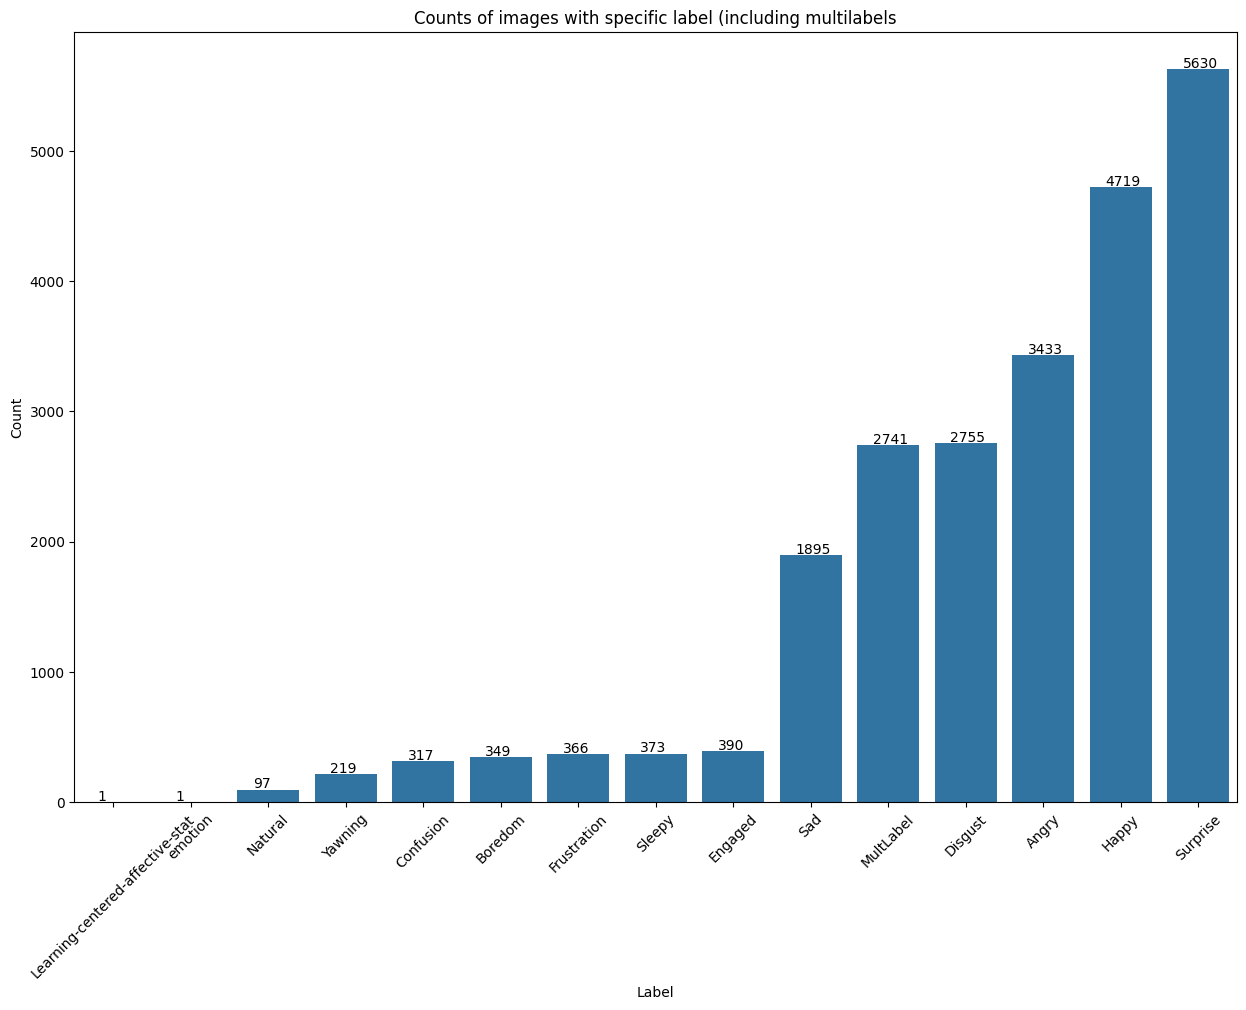

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(counts,x='Label',y='Count')


for i,value in enumerate(counts['Count']):

    plt.text(i-0.2,value+10,str(value))
    plt.xticks(rotation=45)

plt.title("Counts of images with specific label (including multilabels")
plt.show()

In [25]:
counts_include_mult = {}

with open("../src/data/full_data/full_annotations.json","r") as f:

    annotations = json.load(f)
    categories = annotations['categories']
    cat_id_to_name = {cat['id']:cat['name'] for cat in categories}
    annotations = annotations['annotations']
    n_annotation = len(annotations)

    for i in range(n_annotation):

        ann = annotations[i]
        cat_id = ann['category_id']

        if cat_id not in counts_include_mult.keys():

            counts_include_mult[cat_id] = 1
            continue
            
        counts_include_mult[cat_id] += 1

    counts_include_mult = {cat_id_to_name[i]:[counts_include_mult[i]] for i in counts_include_mult}

counts_by_annotations = deepcopy(counts_include_mult)

counts_include_mult = pd.DataFrame(counts_include_mult).T.reset_index().rename(columns={"index":"Label",0:"Count"})

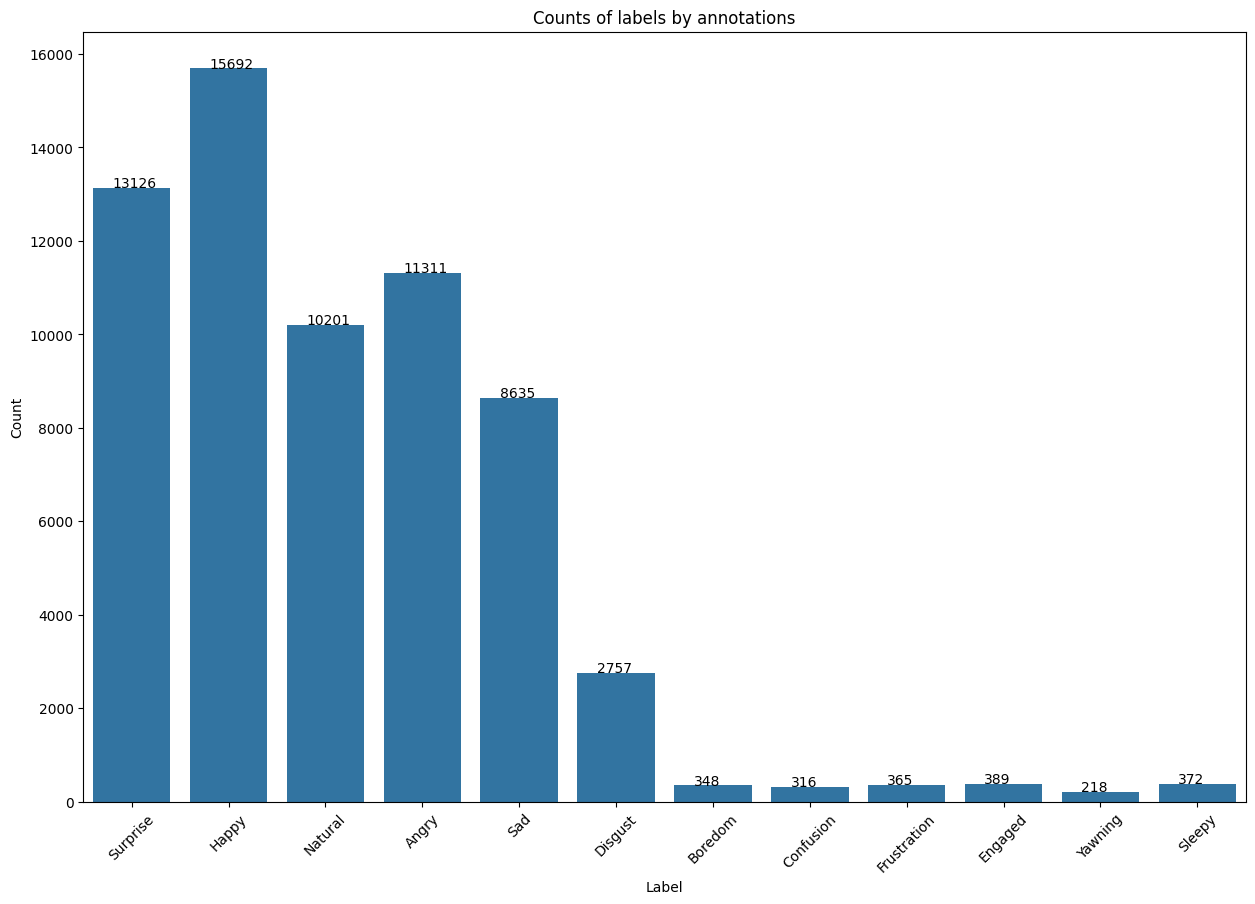

In [26]:
 

plt.figure(figsize=(15,10))
sns.barplot(counts_include_mult,x='Label',y='Count')


for i,value in enumerate(counts_include_mult['Count']):

    plt.text(i-0.2,value+10,str(value))
    plt.xticks(rotation=45)

plt.title("Counts of labels by annotations")
plt.show()


In [27]:
# concat 
concat_dict = {"Happy":"Positive",
              "Surprise":"Surprise",
              "Natural":"Natural",
              "Angry":"Negative",
              "Sad":"Negative",
              "Disgust":"Negative",
              "Boredom":"Negative",
              "Confusion":"Negative",
              "Frustration":"Negative",
              "Engaged":"Positive",
              "Yawning":"Negative",
              "Sleepy":"Negative"}

In [28]:
counts_include_mult['NewLabels'] = counts_include_mult['Label'].map(concat_dict)
couns_by_new_labels = counts_include_mult.groupby("NewLabels",as_index=False)['Count'].sum()

In [29]:
couns_by_new_labels

NewLabels  Count
0   Natural  10201
1  Negative  24322
2  Positive  16081
3  Surprise  13126

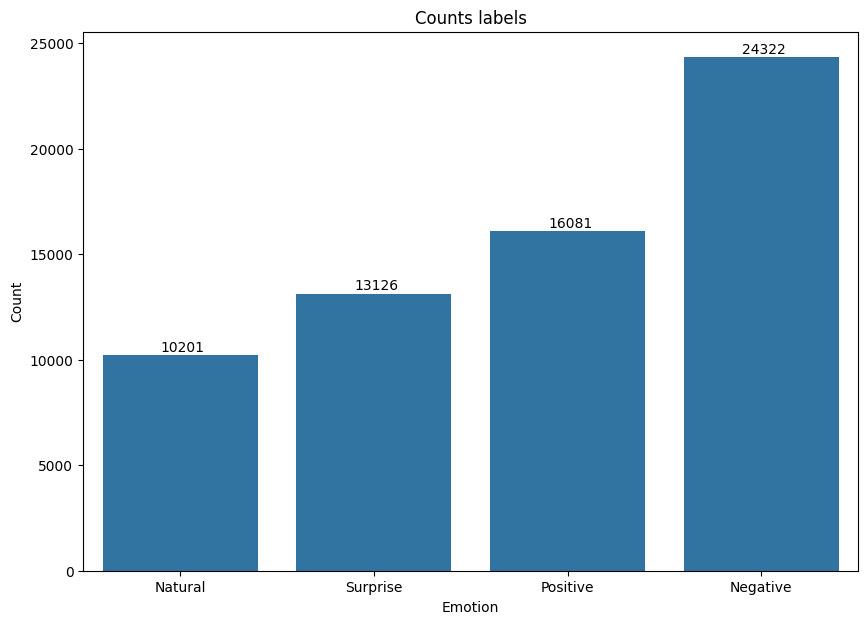

In [30]:
plt.figure(figsize=(10,7))
couns_by_new_labels.sort_values("Count",inplace=True)
sns.barplot(couns_by_new_labels,x='NewLabels',y='Count')

for i,value in enumerate(couns_by_new_labels.Count):

    plt.text(i-.1,value+200,str(value))


plt.xlabel("Emotion")
plt.title("Counts labels")
plt.show()

In [31]:
couns_by_new_labels['Count'].sum() -  4*10201

22926

In [32]:
couns_by_new_labels

NewLabels  Count
0   Natural  10201
3  Surprise  13126
2  Positive  16081
1  Negative  24322

## Old version

In [34]:
# perc_counts = counts.copy()
# total_count = sum(list(counts.values()))

# for key in perc_counts:
#     perc_counts[key] = round(perc_counts[key]/total_count*100,3) 

In [ ]:
# counts_df = pd.DataFrame(list(counts.values()),list(counts.keys())).reset_index().rename(columns={"index":"Emotion",0:'Count'})

In [35]:
# counts_df

In [37]:

# # Defining the plot size
# plt.figure(figsize=(8, 8))
 
# # Defining the values for x-axis, y-axis
# # and from which dataframe the values are to be picked
# plots = sns.barplot(x="Emotion", y="Count", data=counts_df)
 
# # Iterating over the bars one-by-one
# for bar in plots.patches:
   
#   # Using Matplotlib's annotate function and
#   # passing the coordinates where the annotation shall be done
#   # x-coordinate: bar.get_x() + bar.get_width() / 2
#   # y-coordinate: bar.get_height()
#   # free space to be left to make graph pleasing: (0, 8)
#   # ha and va stand for the horizontal and vertical alignment
#     plots.annotate(format(bar.get_height(), '.0f'), 
#                    (bar.get_x() + bar.get_width() / 2, 
#                     bar.get_height()), ha='center', va='center',
#                    size=10, xytext=(0, 8),
#                    textcoords='offset points')
 
# # Setting the label for x-axis
# plt.xlabel("Emotion", size=14)
# plt.xticks(rotation=45)
 
# # Setting the label for y-axis
# plt.ylabel("Count per label", size=14)
 
# # Setting the title for the graph
# plt.title("Labels counts")
 
# # Finally showing the plot
# plt.show()


In [39]:
# print(counts_df.Emotion.values)

In [40]:
import numpy as np

## Trying to remove by occurace rate of negative labels

In [41]:
# counts

with open("./data/full_data/full_nnps/nnps_annotations.json","r") as file:
    full_annotationes = json.load(file)

In [42]:
annotataions = full_annotationes['annotations']
categories = full_annotationes['categories']

In [43]:
categories

[{'id': 0, 'name': 'Negative', 'supercategory': 'none'},
 {'id': 1, 'name': 'Positive', 'supercategory': 'none'},
 {'id': 2, 'name': 'Natural', 'supercategory': 'none'},
 {'id': 3, 'name': 'Surprise', 'supercategory': 'none'}]

In [44]:
counts = {}

initial_counts = []

for ann in annotataions:

    image_id = ann['image_id']
    category_id = ann['category_id']

    ids = list(counts.keys())

    if image_id not in ids:
        counts[image_id] = []

    counts[image_id].append(category_id)
    initial_counts.append(category_id)

multi_images = {key:np.array(value) for key,value in counts.items() if len(value) != 1}

In [45]:
multi_images_ann_counts = {key:np.unique(value,return_counts=True) for key,value in multi_images.items()}


In [46]:
multi_images_ann_counts

{0: (array([0, 1, 2, 3]), array([6, 2, 2, 6])),
 11: (array([0, 2]), array([1, 2])),
 27: (array([0, 1, 2, 3]), array([4, 2, 4, 5])),
 34: (array([0, 1, 2, 3]), array([9, 3, 1, 3])),
 45: (array([1]), array([2])),
 47: (array([0, 1, 2, 3]), array([4, 3, 3, 6])),
 63: (array([0, 1, 2, 3]), array([8, 1, 3, 4])),
 73: (array([0, 1, 2, 3]), array([5, 3, 5, 3])),
 90: (array([0, 1, 2, 3]), array([2, 3, 8, 2])),
 92: (array([0, 1, 2, 3]), array([4, 7, 4, 1])),
 98: (array([0, 1, 2, 3]), array([4, 3, 8, 1])),
 102: (array([0, 1, 2, 3]), array([3, 6, 4, 3])),
 113: (array([0, 1, 2, 3]), array([2, 6, 4, 4])),
 117: (array([0, 1, 2, 3]), array([7, 2, 4, 3])),
 120: (array([0, 1, 2, 3]), array([6, 4, 3, 3])),
 124: (array([0, 1, 2, 3]), array([7, 5, 2, 2])),
 128: (array([0, 1, 2, 3]), array([4, 4, 6, 2])),
 134: (array([0, 1, 2, 3]), array([4, 5, 5, 2])),
 138: (array([0, 1, 2, 3]), array([6, 5, 4, 1])),
 140: (array([0, 1, 2, 3]), array([2, 4, 8, 2])),
 141: (array([0, 1, 2]), array([7, 7, 2]))

In [47]:
np.unique(initial_counts,return_counts=True)

(array([0, 1, 2, 3]), array([24322, 16081, 10201, 13126]))

In [48]:
multi_images_ann_counts = {key:np.unique(value,return_counts=True) for key,value in multi_images.items()}
# multi_images_ann_counts_zero = {key:value for key,value in multi_images_ann_counts.items() if len(value[0]) == 1 and value[0][0] == 0}
# multi_images_ann_counts_mix = {key:value for key,value in multi_images_ann_counts.items() if len(value[0]) != 1}
multi_images_ann_counts_mix = {key:value for key,value in multi_images_ann_counts.items() if value[0][0] == 0}
multi_images_ann_counts_portions = {key:[value[1][0]/np.sum(value[1])] for key,value in multi_images_ann_counts_mix.items()}

In [49]:
counts_df = pd.DataFrame(multi_images_ann_counts_portions).T.reset_index().rename(columns={"index":"image_id",0:"PercentOfNegativeLabels"})
counts_df.sort_values('PercentOfNegativeLabels',inplace=True,ascending=False)

In [50]:
counts_df.head()

image_id  PercentOfNegativeLabels
854       6522                      1.0
1214      9342                      1.0
1253      9588                      1.0
1376     10605                      1.0
1434     11028                      1.0

In [51]:
images_to_remove = counts_df[counts_df['PercentOfNegativeLabels'] > .6].image_id.values
n_images_to_remove = len(images_to_remove)

In [52]:
print(f"Number of images to remove: {n_images_to_remove}")

Number of images to remove: 119


In [53]:
# new_counts = {}

label_counts = []

for ann in annotataions:

    image_id = ann['image_id']

    if image_id in images_to_remove:
        continue
        
    category_id = ann['category_id']

    label_counts.append(category_id)
    continue



multi_images_new = {key:np.array(value) for key,value in counts.items() if len(value) != 1}

In [54]:
np.unique(label_counts,return_counts=True)

(array([0, 1, 2, 3]), array([23386, 15880, 10056, 13087]))

In [55]:
categories

[{'id': 0, 'name': 'Negative', 'supercategory': 'none'},
 {'id': 1, 'name': 'Positive', 'supercategory': 'none'},
 {'id': 2, 'name': 'Natural', 'supercategory': 'none'},
 {'id': 3, 'name': 'Surprise', 'supercategory': 'none'}]

In [56]:
multi_images_ann_counts[63]

(array([0, 1, 2, 3]), array([8, 1, 3, 4]))

In [57]:
total_number_of_images = len(ids)
number_of_mult_images = np.sum(list(map(lambda x: True if len(counts[x]) != 1 else False,ids)))
number_of_one_ann_images = total_number_of_images - number_of_mult_images

In [58]:
print(f"Total number of images: {total_number_of_images}\nMutlilabel images: {number_of_mult_images}\nSingle Label images: {number_of_one_ann_images}")

Total number of images: 23270
Mutlilabel images: 2970
Single Label images: 20300


In [59]:
20300/len(annotataions)

0.3185313039384905

## Bluring

In [60]:
dir_path = "./data/full_data/full_nnps/nnps_full_images/"
with open("./data/full_data/full_nnps/nnps_annotations.json","r") as file:

    full_annotationes = json.load(file)

    annotations = full_annotationes['annotations']
    images = full_annotationes['images']
    categories = full_annotationes['categories']
categories

[{'id': 0, 'name': 'Negative', 'supercategory': 'none'},
 {'id': 1, 'name': 'Positive', 'supercategory': 'none'},
 {'id': 2, 'name': 'Natural', 'supercategory': 'none'},
 {'id': 3, 'name': 'Surprise', 'supercategory': 'none'}]

In [61]:
# iterate over images 
annotations_to_remove = []
n_images = len(images)

for i in range(n_images):

    print(f"{'_-_'*20}{i+1}/{n_images}{'_-_'*20}")

    # if i < 12:
    #     continue

    image = images[i]
    image_id = image['id']
    file_name = image['file_name']
    image_path = os.path.join(dir_path,file_name)
    orig_image = cv2.imread(image_path)
    blured_image = orig_image.copy()
    # annotations

    image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]

    if len(image_annotations) == 1:
        continue

    # if  :
    #     continue
    image_categories = [ann['category_id'] for ann in image_annotations]

    # negative annotaions
    negative_annotations = [ann for ann in image_annotations if ann['category_id'] == 0]
    surprise_annotations = [ann for ann in image_annotations if ann['category_id'] == 3]
    positive_annotations = [ann for ann in image_annotations if ann['category_id'] == 1]

     # if there is not negative label in this image, continue iteration, other wise blurr half of negative images

    

    # number of zeros
    category_counts = np.unique(image_categories,return_counts=True)
    
    # if zero
    zero,counts = category_counts[0][0], category_counts[1][0]

    percent = counts/len(image_categories)
    iters = int(percent * counts)

    for i_r in range(iters):
        
        ann_to_blur = negative_annotations[i_r]
        annotations_to_remove.append(ann_to_blur['id'])

        x1,y1,x2,y2 = [int(x) for x in ann_to_blur['bbox']]
        
        blur_y,blur_height = y1, y1+y2
        blur_x,blur_width = x1, x1+x2

        
        # Extract region of interest (ROI) within the bounding box
        roi = blured_image[blur_y:blur_y+blur_height, blur_x:blur_x+blur_width]
        blur_image = cv2.GaussianBlur(roi,(199,199),0)
    
        blured_image[blur_y:blur_y+blur_height, blur_x:blur_x+blur_width] = blur_image

    if len(annotations_to_remove) >= 10000:
        break
        # break
    
    # break

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_1/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_2/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_3/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_4/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_5/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_6/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_7/23271_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_8/23271_-__-__-__-__-__-__-__-__-__-__-__-__

IndexError: list index out of range

In [62]:
new_annotations = []

for ann in annotations:

    if ann['id'] not in annotations_to_remove:
        new_annotations.append(ann)

In [63]:
new_counts = [ann['category_id'] for ann in new_annotations]
new_counts = np.unique(new_counts,return_counts=True)
new_counts

(array([0, 1, 2, 3]), array([24314, 16081, 10201, 13126]))

In [64]:
category_names = [cat['name'] for cat in categories]
category_names

['Negative', 'Positive', 'Natural', 'Surprise']

In [65]:
categories

[{'id': 0, 'name': 'Negative', 'supercategory': 'none'},
 {'id': 1, 'name': 'Positive', 'supercategory': 'none'},
 {'id': 2, 'name': 'Natural', 'supercategory': 'none'},
 {'id': 3, 'name': 'Surprise', 'supercategory': 'none'}]

In [66]:
new_counts_dict = {key:[value] for key,value in zip(category_names,new_counts[1])}

In [67]:
new_count_df = pd.DataFrame(new_counts_dict).T.reset_index().rename(columns={"index":"NewLabels",0:"Count"})

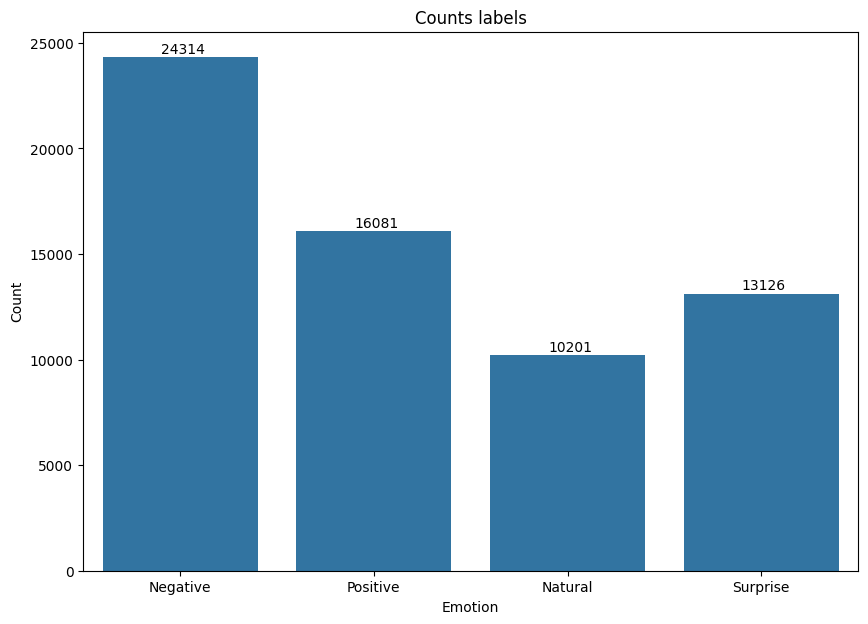

In [68]:

plt.figure(figsize=(10,7))
# new_count_df.sort_values("Count",inplace=True)
sns.barplot(new_count_df,x='NewLabels',y='Count')

for i,value in enumerate(new_count_df.Count):

    plt.text(i-.1,value+200,str(value))


plt.xlabel("Emotion")
plt.title("Counts labels")
plt.show()

In [69]:
image_ann = [ann for ann in annotations if ann['id'] == 48]
image_ann

[{'id': 48,
  'image_id': 27,
  'category_id': 0,
  'bbox': [473, 175, 155.125, 160.531],
  'area': 24902.371,
  'segmentation': [],
  'iscrowd': 0}]

In [70]:
image

{'id': 45,
 'license': 1,
 'file_name': '240_F_91958157_hjHpmXT1gDIi88QbzPIeGyHKdJNXrjJO_jpg.rf.3e464d26e7081bef532847b7be29adf0.jpg',
 'height': 226,
 'width': 482,
 'date_captured': '2023-12-07T22:37:41+00:00'}

In [71]:
with open("./data/full_data/full_nnps/nnps_annotations.json","r") as file:

    full_annotationes = json.load(file)

    annotations = full_annotationes['annotations']
    images = full_annotationes['images']
    categories = full_annotationes['categories']

In [72]:
categories

[{'id': 0, 'name': 'Negative', 'supercategory': 'none'},
 {'id': 1, 'name': 'Positive', 'supercategory': 'none'},
 {'id': 2, 'name': 'Natural', 'supercategory': 'none'},
 {'id': 3, 'name': 'Surprise', 'supercategory': 'none'}]

In [73]:
# image_id = image_ann[0]['image_id']
# image = [img for img in images if img['file_name'] =='44_jpg.rf.9d21802d3d115af8c6255d1e90e50cbe.jpg' ][0]
# image_id = image['id']
# image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]
# image_path = os.path.join("./data/full_data/full_nnps/nnps_full_images/",image['file_name'])




# oring_image = plt.imread(image_path).copy()
# blured_image = oring_image.copy()

# font = cv2.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# color = (255, 0, 0)  # White in BGR
# thickness = 2
# fig,ax = plt.subplots(1,2)

# fig.set_figheight(7)
# fig.set_figwidth(15)

# i = 0

# for img_ann in image_annotations:

#     ann_id = img_ann['id']
    

#     x_1,y_1,x_2,y_2 = [int(x) for x in img_ann['bbox']]
#     blur_y,blur_height = y_1, y_1+y_2
#     blur_x,blur_width = x_1, x_1+x_2
#     # x_1,y_1 = x_1,y_1
#     # x_2,y_2 = x_2,y_2

#     # print(cat_id)
#     cat_id = img_ann['category_id']
#     cat_name = [cat['name'] for cat in categories if cat['id'] == cat_id][0]

#     cv2.rectangle(oring_image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
#     cv2.putText(oring_image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)

#     if  cat_id == 0.0:

#     #     # print(cat_name,cat_id)    
 
#     #     # Extract region of interest (ROI) within the bounding box
#         roi = blured_image[blur_y:blur_y+blur_height, blur_x:blur_x+blur_width]
#         blur_image = cv2.GaussianBlur(roi,(199,199),0)
    
#         blured_image[blur_y:blur_y+blur_height, blur_x:blur_x+blur_width] = blur_image
#     #     continue
        
#     # else:
        
#     #     cv2.rectangle(blured_image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
#     #     cv2.putText(blured_image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)
        
        
    
# ax[0].imshow(oring_image)
# ax[1].imshow(blured_image)

# plt.show()

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


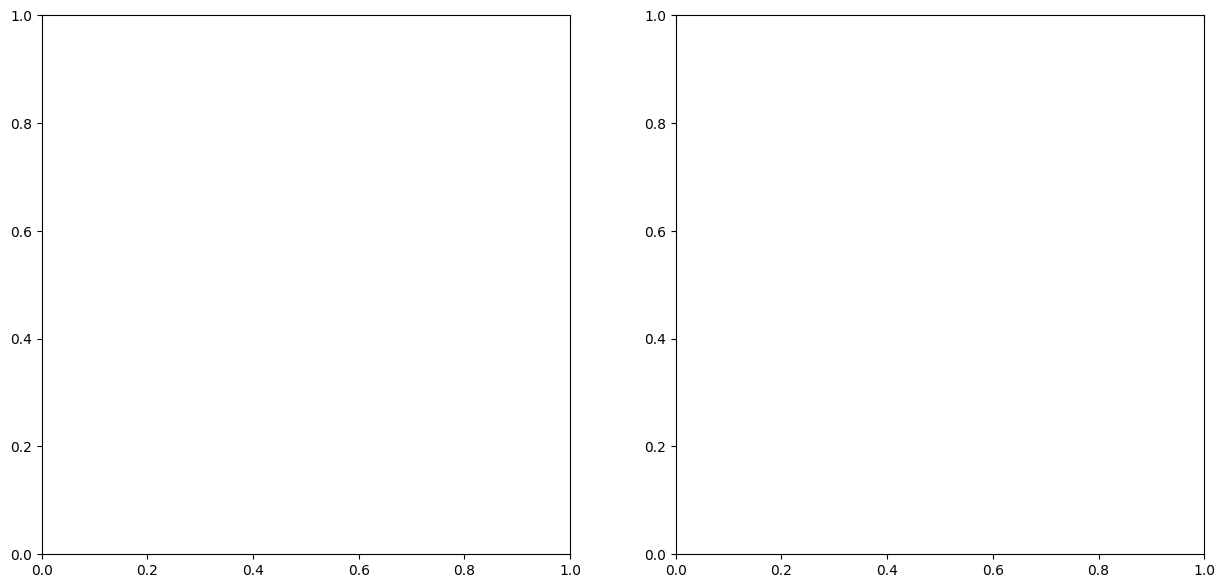

In [75]:
image_id = image_ann[0]['image_id']
image = next((img for img in images if img['file_name'] == '44_jpg.rf.9d21802d3d115af8c6255d1e90e50cbe.jpg'), None)
image_id = image['id']
image_annotations = [ann for ann in annotations if ann['image_id'] == image_id]
image_path = os.path.join("./data/full_data/full_nnps/nnps_full_images/", image['file_name'])
orig_image = plt.imread(image_path).copy()
blured_image = orig_image.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 0, 0)  # White in BGR
thickness = 2

fig, ax = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)


i = 0

for img_ann in image_annotations:
    x_1, y_1, x_2, y_2 = [int(x) for x in img_ann['bbox']]
    # x_1, y_1, x_2, y_2 = x_1-10, y_1-10, x_2+10, y_2+10
    cat_id = img_ann['category_id']
    cat_name = next((cat['name'] for cat in categories if cat['id'] == cat_id), None)

    cv2.rectangle(orig_image, (x_1, y_1), (x_1 + x_2, y_1 + y_2), (0, 255, 0), 2)
    cv2.putText(orig_image, cat_name, (x_1, y_1 + 20), font, font_scale, color, thickness)

    # Check for the desired "negative label" category_id
    if cat_id == 0 and i < 4:
        blur_y, blur_height = y_1, y_2
        blur_x, blur_width = x_1, x_2
        roi = blured_image[blur_y:blur_y + blur_height, blur_x:blur_x + blur_width]
        blur_image = cv2.GaussianBlur(roi, (711, 711), 0)
        blured_image[blur_y:blur_y + blur_height, blur_x:blur_x + blur_width] = blur_image
        i+=1

    else:
        
         cv2.rectangle(blured_image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
         cv2.putText(blured_image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)
        

print()
print()
ax[0].imshow(orig_image)
ax[0].axis("off")
ax[1].imshow(blured_image)
ax[1].axis("off")
plt.show()

In [ ]:
with open("./data/full_data/full_nnps/nnps_annotations.json","r") as file:

    full_annotationes = json.load(file)
    annotations = full_annotationes['annotations']
    images = full_annotationes['images']